# Micrograd

- About:
    - Micrograd is basically a tiny autograd.
    - **Autograd**: Automatic Gradient
    - It basically implements back propagation
    - You can bulid out a mathematical expression and see the connections.
      Meaning, you can see the values and how they are connected with an operator
      `Eg: c = a + b; meaning: c has two chlidren, a and b who are connected by a '+' operator`
      ```
                  a   b
                   \ /
                    +
                    |
                    c
      ```
    - This way, you know exactly how all of this is layed out
    - micrograd allows you to go forward in the expression, basically evaluate the expression.
      And go backward the expression with the help of backpropagation. Here, you calculate the 
      gradients of all the elements involved in forming the result and see how each of their change
      impacts the result.

### Objective
To define and train a neural network and learn what happens under the hood.

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib is a magic function in IPython. %matplotlib inline sets the backend of matplotlib to the 'inline' backend:

In [16]:
# lets define a function that takes a single scalar val x and returns another scalar y
def f(x):
    y = 3*(x**2) - (4*x) + 5
    return y

In [17]:
f(5.0)

60.0

In [18]:
# plotting the function to get a sense of its shape
xs = np.arange(start=-5, stop=5, step=0.25)
ys = f(xs)
print(xs, ys, sep='\n')

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


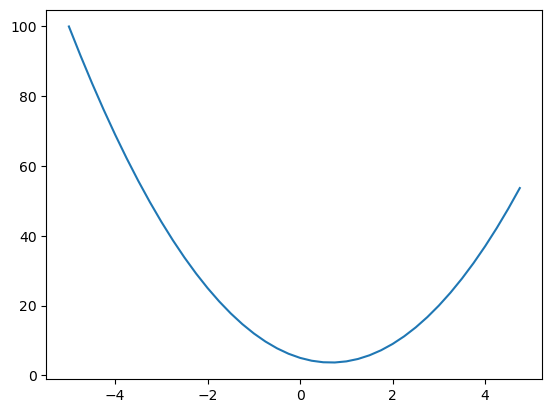

In [19]:
plt.plot(xs, ys)

### Derivative
- Seeing how the function responds/behaves if we slightly nudge x to the positive direction
- h is the nudge value (infinitesimally small value)

In [20]:
h =  0.00000001
x = 3.0
y1 = f(x)
y2 = f(x + h)

print(f"x: {x}\ny1: {y1}\ny2: {y2}\nchange: {y2 - y1}")

'''
(y2 - y1) is how much the function responded
(y2 - y1)/h sort of normalizes it by run. How much rise was gained wrt to the run: This is the SLOPE of the function at the x
'''
slope = (y2 - y1)/h
print(f"slope: {slope}")

'''

slope variable is just a numerical approximation of the slope.
'h' in theory is very very small. Can't be defined in a paper.

If you reduce h to very small value. At some point we will get undefined behaviour.
Because we are using floating point numbers here and their representation in computer
memory is very finite
'''

x = -3
y1 = f(x)
y2 = f(x + h)
response_to_change = y2 - y1 # if you look at the graph you will realize that if you nudge -3 to the right, the value of y(i.e. f(x)) actually reduces
slope = response_to_change/h

print(f"x: {x}\nresponse_to_change: {response_to_change}\nslope: {slope}")

# since the curve is continuous and you are going from -ve to +ve value, you are definitely going 
# to hit slope 0. That means a slight nudge on x to the right has no effect on y
# upon calculation, that value of x is 2/3
x = 2/3
y1 = f(x)
y2 = f(x + h)
response_to_change = y2 - y1
slope = response_to_change/h
print(f"x: {x}\nresponse_to_change: {response_to_change}\nslope: {slope}")

x: 3.0
y1: 20.0
y2: 20.00000014
change: 1.400000009255109e-07
slope: 14.00000009255109
x: -3
response_to_change: -2.200000039920269e-07
slope: -22.00000039920269
x: 0.6666666666666666
response_to_change: 0.0
slope: 0.0


In [21]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


We wanna look at the derivate(partial derivative) of d wrt **a**, **b** and **c**. Basically, see how d behaves
upon changing **a** or **b** or **c** while keeping all the other terms constant

In [22]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c

# derivative of d1 wrt a
print("derivate of d1 wrt a")
a += h
d2 = a*b + c
print('d1: ',d1)
print('d2: ',d2)
print('slope: ',(d2 - d1)/h)
# a is slightly more +ve then a*b will be slightly more negative. Hence, the overall value will go DOWN slightly
# Hence, the -ve sign.

# Another observation is that the change in a affects (a*b) independently, c doesn't have anything to do with it.
# And if you look at the derivate of d1 mathematically, then the result is indeed b.


print("derivate of d1 wrt b")
a = 2.0 # original value of a
b += h
d2 = a*b + c
print('d1: ',d1)
print('d2: ',d2)
print('slope: ',(d2 - d1)/h)

print("derivate of d1 wrt c")
b = -3.0 # original value of b
c += h
d2 = a*b + c
print('d1: ',d1)
print('d2: ',d2)
print('slope: ',(d2 - d1)/h)

derivate of d1 wrt a
d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772
derivate of d1 wrt b
d1:  4.0
d2:  4.0002
slope:  2.0000000000042206
derivate of d1 wrt c
d1:  4.0
d2:  4.0001
slope:  0.9999999999976694


Now that we have some intuition to what a derivate actually means. Lets build a NN.
But NNs will be pretty massive expressions. We need some data structures that maintain these expressions.
 
We'll do so using a **Value** class

details:
1. We need a data var to store the value of the object
2. a set to store the children of the value. The values that created our value (the expression)
3. the operator used with the children to create the value
4. a label which is just the name of the object representing the Value. This is done to visualize later
5. a grad var that maintains the derivative of output wrt current value

In [158]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children) # set used for efficiency
        self.grad = 0.0 # 0.0 means no effect. Initially we are assuming that changing this value has no effect in the output
        self._backward = lambda: None # by default, this function does nothing. Eg: For leaf node, ther's nothing to do
        self._op = _op
        self.label= label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad  += 1.0 * out.grad # += because if a Value is used more than once in an expression that according to chain rule, its gradients accumulate i.e add
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self + other
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)
    
    def __rsub__(self, other):
        return other + (-self)
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad  += other.data * (out.grad)
            other.grad += self.data * (out.grad)
        out._backward = _backward
        return out
    
    # if a * b is not allowed (eg: a is an int and b is Value obj, then Python gets confused) reverse the order of operation
    # same for add, sub, div etc
    def __rmul__(self, other): # other * self
        return self * other
    
    def __truediv__(self, other): # truediv: /, div: //
        return self * (other ** -1)
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)) # only supporting int/float powers for now
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += (other) * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        
        # tanh(x) = (e^(2x) - 1) / (e^(2x) + 1)
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        
        def build_topo(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    build_topo(child)
                topo.append(node)
        
        build_topo(self)
        
        self.grad = 1
        for node in reversed(topo):
            node._backward()
        
    def copy(self):
        copied_value = Value(self.data, self._prev, self._op, self.label)
        copied_value.grad = self.grad
        
        return copied_value
    

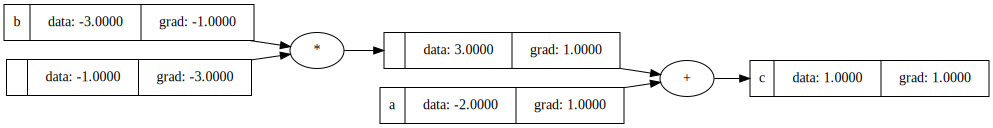

In [156]:
a = Value(-2, label='a')
b = Value(-3, label='b')
c = a - b; c.label = 'c'

c.backward()
draw_dot(c)

In [28]:
a = Value(-2, label='a')
b = Value(4, label='b')
b.data += 0.01
c = a / b; c.label='c'

c.backward()
draw_dot(c)

NameError: name 'draw_dot' is not defined

In [29]:
a = Value(-2, label='a')
2 + a

Value(data=0)

In [27]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'
L
# a + b => # a.__add__(b)
# d = a*b + c # (a.__mul__(b)).__add__(c)
# (a.__mul__(b)).__add__(c), this works the same

Value(data=-8.0)

In [30]:
L._prev

{Value(data=-2.0), Value(data=4.0)}

In [31]:
L._op

'*'

In [32]:
from graphviz import Digraph

# not so scary. Just like a tree ds
def trace(root):
    # build a set of all the nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(vertex):
        if vertex not in nodes:
            nodes.add(vertex)
            for child in vertex._prev:
                edges.add((child, vertex))
                build(child)
    
    build(root)
    return nodes, edges

nodes, edges = trace(d)

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n)) # id is an int that represents a unique identity of an object
        
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label = "{ %s | data: %.4f | grad: %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # add/connect this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

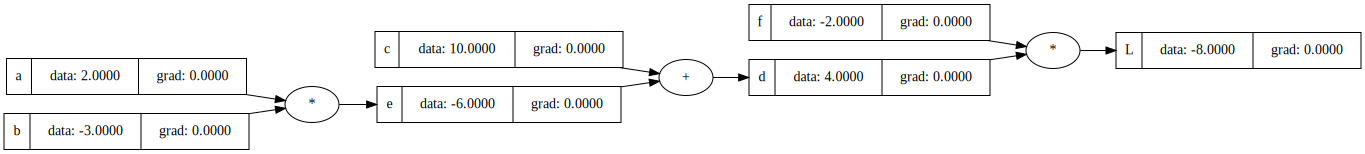

In [33]:
draw_dot(L)

# visualization of the forward pass

### Backpropagation Manually


In [34]:
# derivative of L wrt L
    # how much does L change if we increase L by h
    # it increases by h. It is proportional to h
    # So, the derivative will be 1
# lets verify

# creating this function because we don't want to pollute the
# global scope (of a, b, c, d, e, f, L)
def lol():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
#     # nudging a by h while keeping rest constant
#     a = Value(2.0 + h, label='a')
#     b = Value(-3.0, label='b')
#     c = Value(10.0, label='c')
#     e = a*b; e.label='e'
#     d = e+c; d.label='d'
#     f = Value(-2.0, label='f')
#     L = d * f; L.label = 'L'
#     L2 = L.data
    
#     # nudging b by h while keeping rest constant
#     a = Value(2.0, label='a')
#     b = Value(-3.0 + h, label='b')
#     c = Value(10.0, label='c')
#     e = a*b; e.label='e'
#     d = e+c; d.label='d'
#     f = Value(-2.0, label='f')
#     L = d * f; L.label = 'L'
#     L2 = L.data
    
#     # nudging d by h while keeping rest constant
#     a = Value(2.0, label='a')
#     b = Value(-3.0, label='b')
#     c = Value(10.0, label='c')
#     e = a*b; e.label='e'
#     d = e+c; d.label='d'
#     d.data += h
#     f = Value(-2.0, label='f')
#     L = d * f; L.label = 'L'
#     L2 = L.data
    
#     # nudging f by h while keeping rest constant
#     a = Value(2.0, label='a')
#     b = Value(-3.0, label='b')
#     c = Value(10.0, label='c')
#     e = a*b; e.label='e'
#     d = e+c; d.label='d'
#     f = Value(-2.0, label='f')
#     f.data += h
#     L = d * f; L.label = 'L'
#     L2 = L.data
    
#     print((L2 - L1)/h)
    

lol()

In [35]:
L.grad = 1.0

- we know that

`L = d * f`
- Now we want to know how L changes wrt d
`dL/dd = ?`
- Mathematically, it would be f

- proof
    - `f'(x) = (f(x + h) - f(x))/h`
    - `dL/dd = ((d+h)*f) - d*f)/h`
    - `=> (d*f + h*f - d*f)/h`
    - `=> (h*f)/h`
    - `=> f`

In [36]:
d.grad = f.data
f.grad = d.data

## <span style="color: #E74C3C;">Very Important</span>
<span style="color: #5DADE2;">This is the <b>curx</b> of backpropagation</span>

- Now, we want to know how change/nudge in c affects L
- Notice, c doesn't directly affects L, it evauates d
- But d directly affects L

- So we know that
    - d directly affects L
    - c directly affects d
    - then c must affect L indirectly(via d)
- So, to know how c affects L we need to find some sort of connection between c -> d and d -> l

> A little more digging
- dd/dc = 1.0 (this is a local derivative. The + node only knows how c and e impact d. That's it)
- dd/de = 1.0 (not important for this conversation though)

- Similarly
- dl/dd = f (this is also a local derivative. The * node only knows how d and f impact L. That's it)
- dl/df = d (not important for this conversation though)

- The connection ofcourse is the **Chain Rule**



In [37]:
c.grad = d.grad*1 # dd/dc = 1
e.grad = d.grad*1 # dd/de = 1

 # Similarly
a.grad = e.grad*b.data # de/da = b
b.grad = e.grad*a.data # de/db = a

In [38]:
# nudging c by a tiny step in the dir of its gradient
c.data += 0.1 * c.grad  # step_size = 0.1
# if c is nudged by h L is nudged by -2h then 
# if c is nudged by 0.1*(-2) = -0.2 then L will be nudged by -2*(-0.2) = 0.4
# nudged L will be -8 + 0.4
        
d = c + e
L = d * f
L

Value(data=13.397506234413965)

### understanding the significance of the dir and magnitude of the gradient
- The direction is simple to understand
    - -ve sign indicates that upon nudging x to right(i.e. increasing x) z actually decreases
    - +ve sign indicates that upon nudging x to right(i.e. increasing x) z actually increases
    - Why? -ve value could only be possible when f(x+h) < f(x)
- The magnitude signifies how important x is to z, in other words how much does a small nudge in x impacts z
- if |a.grad| > |b.grad| then, it means the if we nudge a by h then it will have a larger impact in the change in value of z compared to the same nudge in b
- if a.grad > 0 and b.grad < 0 then, it means if we nudge a by h, z will increase. But if we nudge b by h then z will decrease

In [39]:
# lets try to increase the value of L by a little bit
'''
we can do so, easily by nudging the values in the dir of its gradient
'''
step_size = 0.1
a.data += step_size*a.grad
e = a*b
d = c+e
f.data += step_size*f.grad
L = d*f
L

Value(data=19.095636987531172)

## Now, we are going to backpropagate through a neuron

### <span style="color: #2ECC71">A Biological Neuron<span>
![a biological neuron](./neuron.png)
--- 
### <span style="color: #2ECC71">An Artificial Neuron aka Perceptron<span>
![Perceptron](./neuron_model.jpeg)
    
### The Perceptron
- x: the input to the perceptron
- w: weight of the connections to the neuron. These interact with the input multiplicatively
- b: bias is just like an innate trigger happiness. Bias can make the perceptron a bit more trigger happy or trigger sad regardless of the input
- there are many inputs and the interact with each other as addition of their multiplicative behaviour with weights
- f: an activation function. An activation function is usually some kind of a squashing function(*eg: sigmoid, tanh, relu*). They generally bring the scale of the (sum(wx)+b) to a small range of value while keeping their relative relation intact 

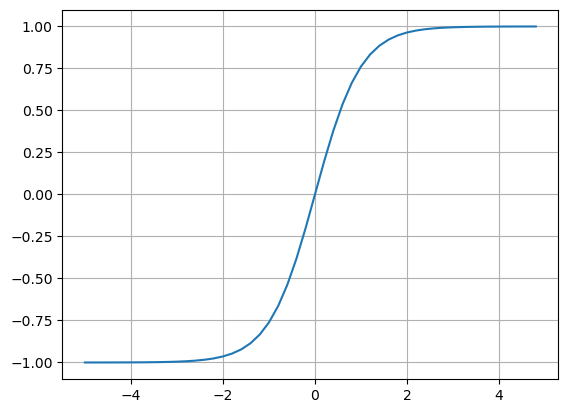

In [40]:
# sample activation function to get their feel
# tanh
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid()

If you observe the tanh graph, there are a few things to notice
- if you pass in 0, 0 is returned
- if you pass a very positive value then we will cap it smoothly to 1
- if you pass a very negative value then we will cap it smoothly to -1

In [41]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.8813735870195432, label='b')

# xw
x1w1 = x1*w1; x1w1.label = 'x1w1'
# x1w2 = x1*w2; x1w2.label = 'x1w2'
# x2w1 = x2*w1; x2w1.label = 'x2w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

# summation of xw for each pair
# x1w1_x1w2_x2w1_x2w2 = x1w1 + x1w2 + x2w1 + x2w2; x1w1_x1w2_x2w1_x2w2.label = 'x1w1_x1w2_x2w1_x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

# non activated body of the perceptron 
n = x1w1x2w2 + b; n.label = 'n'

# activated output
o = n.tanh(); o.label = 'o'

- One thing to note is that we can use any arbirary activation function. It can be a very complicated function or a very simple function. The only thing that matters is that we know how to differentiate through any one function.

- That is the reason why we are not keeping track of the simpler functions that make tanh (exponent, multiplication, subtraction, addition, division). Because we don't care about what makes the activation function as long as we can differentiate it.

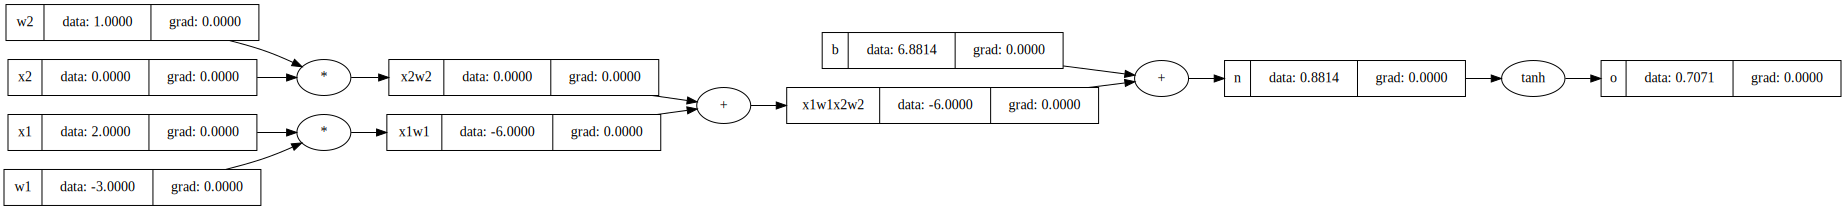

In [42]:
draw_dot(o)

### Now we are going to backpropagate through this neuron/perceptron

In [43]:
o.grad = 1.0 # quite obvious

In [44]:
# backpropagate through tanh
# o = tanh(n)
# do/dn = 1 - tanh(n)**2
# do/dn = 1 - o**2
n.grad = (1 - (o.data**2))

In [45]:
# backpropagate through +
# as we saw before, + is just a distributer of gradient
# so the children will share the gradient with the parent

x1w1x2w2.grad = n.grad
b.grad = n.grad

In [46]:
# backpropagate through +
# same for these two
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

In [47]:
# backpropagate through +
# multiplication is just value exchanger 
x1.grad = x1w1.grad*w1.data
w1.grad = x1w1.grad*x1.data

x2.grad = x2w2.grad*w2.data
w2.grad = x2w2.grad*x2.data

### Automating Backpropagation
- Now, that we now how backpropagation works to see how each component of the function affects the output
- Obviously, when the function grows in size and gets more complex, doing backpropagation manually will be very tedious, error-prone and complete madness
- So,to put an end to this suffering, we are going to implement backpropagation manually

- We are going to automate backprop by implementing a function **_backward**
- For each node that took input(s) and produced an output, we are going to chain the grads of the output into the inputs

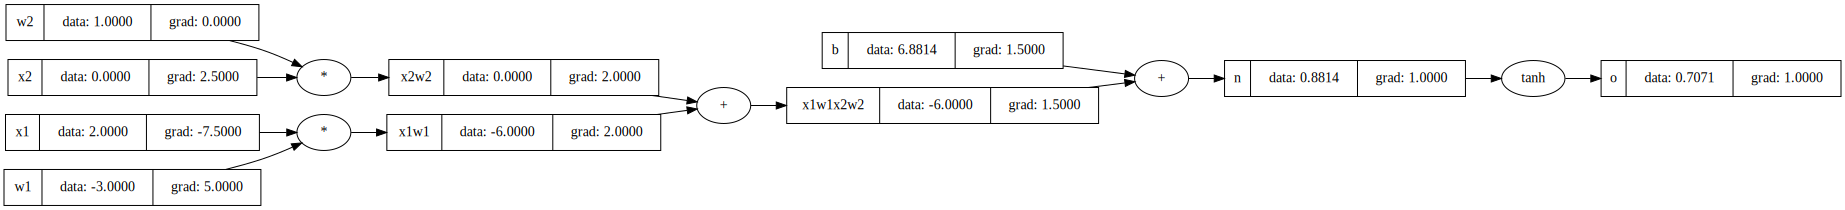

In [56]:
draw_dot(o)

In [49]:
o.grad = 1.0 # base case
o._backward()

In [50]:
n._backward()

In [51]:
x1w1x2w2._backward()

In [52]:
# b is not a parent. It's _backward will be None
b._backward()

In [53]:
x1w1._backward()

In [54]:
x2w2._backward()

In [55]:
# All leaf nodes. So, no effect
x1._backward()
x2._backward()
w1._backward()
w2._backward()

### Now, let's finally automate the whole backpropagation process
- So, what did we learn from what we just did(i.e. _bacward() thing)?
    - The main lesson to learn here is that, in order to calculate the grad of a node, we need all its dependencies, i.e. the grads of all the nodes that come after it(well, essentially those whose value the current_node contributes to)

- So basically, we want to **order** our "graph" or here 'our NN', such  that upon reaching a node, we have all its dependencies met to calculate its gardient.

- This can be achieved via <span style="color:#0074B7;"><b>Topological Sort</b></span>

In [57]:
# implementing topological sort
topo = []
visited = set()

def build_topo(vertex):
    if vertex not in visited:
        visited.add(vertex)
        for child in vertex._prev:
            build_topo(child)
        topo.append(vertex)

build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

- So, what do we do?
    - set o.grad = 1.0 => base case
    - topological sort the expression to make sure that the children of an expression come before that expression(all dependencies satisfied)
    - traverse the sorted array in reverse order because we want to **backpropagate** the error
    - and for each node do _backward()
   
#### My Take
- Andrej Karpathy layed then from bottom to top i.e. the children come first.
- But since we actually have to backpropagate, why don't we just lay them out from top to bottom by doing this:
```python
    topo = []
    visited = set()

    def build_topo(vertex):
        if vertex not in visited:
            visited.add(vertex)
            topo.append(vertex)
            for child in vertex._prev:
                build_topo(child)

    build_topo(o)
    topo
```

```python
'''
output: 
[Value(data=0.7071067811865476),
 Value(data=0.8813735870195432),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=6.881373587019543)]
 '''
```

- But I'm following Andrej, for consistency

In [58]:
# step 1
o.grad = 1

# step 2
topo = []
visited = set()

def build_topo(vertex):
    if vertex not in visited:
        visited.add(vertex)
        for child in vertex._prev:
            build_topo(child)
        topo.append(vertex)

build_topo(o)

# step 3
for node in reversed(topo):
    node._backward()

### Finally, we are going to find this functionality inside the Value function
- Go to the Value class to add the change in the `backward()` function

In [59]:
o.backward()

### Demonstration of a Value being used more than once

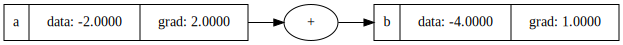

In [60]:
a = Value(-2, label='a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

# although the image shows only 1 arrow from a,  there are actually two arrows one on the other.

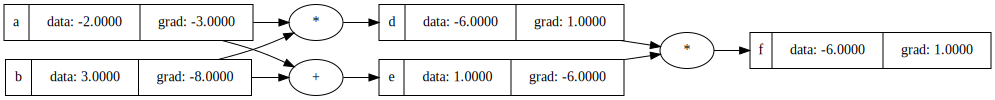

In [61]:
a = Value(-2.0, label='a')
b = Value(3.0,  label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

- As mentioned earlier, if we know the derivative of a function, we don't actually have to know how that function is built from ground up.
- To prove that, we are now going to buid the tanh function from its more simpler functions like *, +, / and exponentiation

In [ ]:
# a fix to implement the tanh
# suppose 
'''
a = Value(-2, label='a')
a = a + 1
'''
# AttributeError: 'int' object has no attribute 'data'
# Because we don't yet have a functionality to add a Value obj with int or float
# the fix must already be added in the class

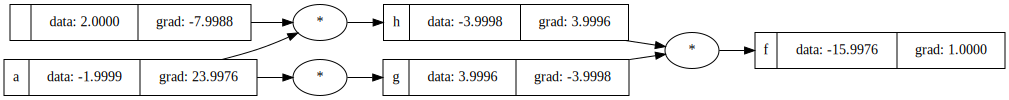

In [62]:
# my personal test
a = Value(-2, label='a')
nudge = 0.0001
a.data = a.data + nudge
g = a * a; g.label = 'g'
h = 2 * a; h.label = 'h'
f = g * h; f.label = 'f'

f.backward()
draw_dot(f)

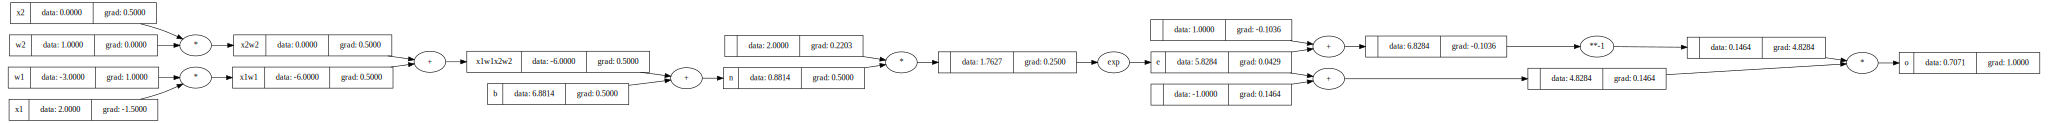

In [63]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.8813735870195432, label='b')

# xw
x1w1 = x1*w1; x1w1.label = 'x1w1'
# x1w2 = x1*w2; x1w2.label = 'x1w2'
# x2w1 = x2*w1; x2w1.label = 'x2w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

# summation of xw for each pair
# x1w1_x1w2_x2w1_x2w2 = x1w1 + x1w2 + x2w1 + x2w2; x1w1_x1w2_x2w1_x2w2.label = 'x1w1_x1w2_x2w1_x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

# non activated body of the perceptron 
n = x1w1x2w2 + b; n.label = 'n'

# activated output
# ------------
e = (2*n).exp(); e.label='e'
o =(e - 1) / (e + 1)
# ------------

o.label = 'o'

o.backward()
draw_dot(o)

## Doing the same thing, but using a modern library which is much more efficient and can handle A LOT more complexities

# <span style="color:#EE4C2C;">PyTorch</span>
![pytorch-logo](./pytorch_logo.png)

In [64]:
import torch

In [65]:
x1 = torch.Tensor([2.0]).double()              ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()               ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()              ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()               ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad  = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('------')
print('x1: ', x1.grad.item())
print('x2: ', x2.grad.item())
print('w1: ', w1.grad.item())
print('w2: ', w2.grad.item())
print('b:  ', b.grad.item())

0.7071066904050358
------
x1:  -1.5000003851533106
x2:  0.5000001283844369
w1:  1.0000002567688737
w2:  0.0
b:   0.5000001283844369


In [69]:
print(o)
print(o.item())

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)
0.7071066904050358


## Now, we are ready to build Neural Nets
- Remember, neural nets are just a specific class of the mathematical expressions that we have built so far.
- Pytorch is just much more efficient, fast and has a lot lot more functionalities with it.

![CS231n_MLP](./cs231n_neuron_mlp.jpeg)

In [73]:
import random

### The Neuron Class

In [169]:
class Neuron:
    def __init__(self, num_of_inputs):
        self.weights = [Value(random.uniform(-1, 1)) for _ in range(num_of_inputs)]
        self.bias = Value(random.uniform(-1, 1))
    
    def __call__(self, x): # x -> input layer
        activation = sum(((wi * xi) for wi, xi in zip(self.weights, x)), self.bias)
        # passing the activation through a non-linearity
        out = activation.tanh()
        return out
    
    def parameters(self):
        return self.weights + [self.bias]

- The **__call__ () function**
    - (w * x) + b
    - what we need to do here is to multiply all the elements of w with all the elements of x pairwise
    - and them add them
```
    x: 1   2   3
         |   |   |
         * + * + *
         |   |   |
    w: 4   5   6
```

    - to do that, we are going to use the `zip()` function.
    - zip() essentially takes two different iterables(like lists, tuples, dictionaries etc) 
    - and returns another iterable object containing tuples of the elements of the two iterables in pair
```python
    l1 = [1, 2, 3]
    l2 = [4, 5, 6]

    zipped = zip(l1, l2)
    # zipped -> <zip at 0x7fb60980a900>
    list(zipped)
    # output : [(1, 4), (2, 5), (3, 6)] 
```

In [131]:
x = [2.0, 3.0]
n = Neuron(2)
n(x) # n.__call(x)

Value(data=-0.379109079211283)

## The Layer(/NeuronPerceptron) Class
- What is a Layer of Neurons?
    - A set of neurons evaluated independently

In [171]:
class Layer:
    def __init__(self, num_of_inputs_in_a_neuron, num_of_neurons):
        self.neurons = [Neuron(num_of_inputs_in_a_neuron) for _ in range(num_of_neurons)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs   
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

In [133]:
# Now instead of just a single neuron, we can have layers of neurons
layer_of_neurons = Layer(num_of_inputs_in_a_neuron=2, num_of_neurons=3)
list(layer_of_neurons(x))

[Value(data=0.34699036319402193),
 Value(data=-0.9741303529720097),
 Value(data=-0.9952403870818995)]

In [172]:
class MLP:
    def __init__(self, num_of_inputs_in_a_first_layer_neuron, num_of_layers: list):
        sz = [num_of_inputs_in_a_first_layer_neuron] + num_of_layers
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(num_of_layers))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

### The MLP Class Description
- This class can seem a little complicated at first sight, buts its quite interesting
- suppose you have an input vector of size 3 i.e. `len(x) = 3` it means, to make a fully-connected NN, each neuron in the next layer must have 3 input weights and 1 bias, right?
- Now, as it is quite evident from the picture(the one with layers of neurons) that output of one layer acts as an input for another.
    - So, what does the **Layer Class** do?
        - It creates a layer of independent neurons of specified number with specified number of weights. And upon calling it, it basically does
        $$\mathrm{out} = tanh(\sum_{i=0}^{n} (wi*xi) + b)$$
            for each of the neurons and return it list of these neurons
- Now that we know all the the individual pieces, lets see the **MLP Class**.
    - first we send the number of neurons of the first hidden layer(same as the number of input_size as discussed above)
    - Then we send a list of layers where each element denotes the number of neurons in that layer
    - We add them up and store it in `sz` variable. Why?
        - As discussed above in point 3 that ouput of one layer is input to the next, so, let's take an example to understand this. 
        ---
         ```
         Suppose there are three layers:
         layers = [4, 4, 1]
         4: number of neurons in layer 1 (hidden layer 1)
         4: number of neurons in layer 2
         1: number of neurons in layer 3. This is the output layer
         
         now suppose our input has 3 values
         x = [2, 3, -1]
         
         Then, to fully connect this input layer with our first hidden layer, each of the neurons requires 3 inputs(1 for each value of x)
         So, for the neurons of the first hidden layer, we need 3 weights for each of them.
         so we do MLP(3, [4, 4, 1])
         
         NOW, this part is pretty important
         look at the __init__() function of MLP
         we have
             sz = [num_of_inputs_in_a_first_layer_neuron] + num_of_layers
             self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(num_of_layers))]
         
         The reason for the first line can be understood from the second line
         our sz is [3, 4, 4, 1]
         What does MLP(3, [4, 4, 1]) do?
             It creates layers of neurons with specified length and appropriate number of neurons in each of them
             We already know the length of each layer, but how do we figure out the number of weights in each neuron in each of their respective layer?
                 one line "output for one is input for next". Since we had 3 inputs the first layer neurons had 3 weights each. The number of neurons in the first layer is 4. For the next layer the number of inputs is 4, so each of the neurons in the 2nd hidden layer will require 4 inputs. For the third layer there are 4 again inputs, so for each neuron in the 3rd layer we require 4 weights.
                 That is why this second line i.e. 
                              self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(num_of_layers))]
         
         
         # The __call__() function
             How do we get output of the first hidden layer?
                 - We will call Layer(3, 4)(). This will return us a list or "layer" of neurons after calc and non-linearity. What will be its length? 4, right? 1 for each neuron.
              Now, we just need to reapeat this process for each layer, making the output of the prev layer, input for the next one. 
         ```

In [173]:
# the NN as shown in the above picture
x = [2.0, 3.0, -1.0]
nn = MLP(len(x), [4, 4, 1])
nn(x)

Value(data=-0.6945717141662063)

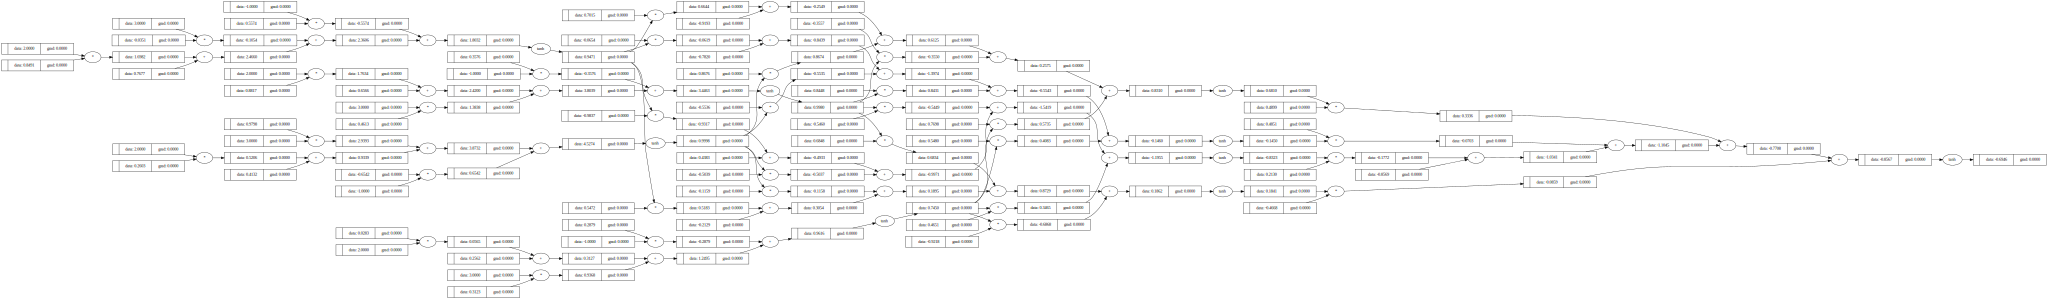

In [174]:
draw_dot(nn(x))

In [182]:
xs = [
    [ 2.0,  3.0, -1.0],
    [ 3.0, -1.0,  0.5],
    [ 0.5,  1.0,  1.0],
    [ 1.0,  1.0, -1.0]
]

ys = [ 1.0, -1.0, -1.0, 1.0] # desired outputs

y_pred = [nn(x) for x in xs]
y_pred

[Value(data=-0.6000231549114434),
 Value(data=-0.8876392966724415),
 Value(data=-0.6543442007447721),
 Value(data=-0.7950969402833343)]

### How do we tune the parameters to make our NN perform better?
- If you see our predicted outputs(y_pred) and compare it with the ground truth(ys) you'll see  that our prediction is pretty bad.
- More generally, the farther your pred is from the ground_truth the worse the performance of your NN is
- So, how do we make the performance of our NN better? Well we already learned that from our own little engine `Value()`. We calculate the gradient of our output and backpropagate the gradient to all the parameters and apply the changes accordingly.
- Earlier we were just calculating the output, setting its grad to 1 and then backpropagating it to learn how each parameter contributes to the value of our output, but here, we actually have to change our output in a certain way so that its value is closer to ground_truth.
- How do we do that? Since we know that the grad of a value with respect to a parameter just gives the slope(or more intuitively, its contribution to our value), why don't we just send the diffrence of our pred and truth back to see how much each of the parameters contribute to it. And apply changes accordingly
- Well, now the question is, "There are 4 values, how do we send all of them back". Well in NN, there is a trick that we follow, that sort of gives the overall picture of the difference between our pred and truth.
- This is called **the loss function**. It is simply the sum of the squares of the difference b/w pred and truth. We can also divide this by the number of output neurons to get the mean.


### Why Square the difference?
- Well, all we really care about is how far our prediction and output are and not the direction
- But why square though? We can also calculate the absolute value. That is called mean_absolute_error. The problem is |x| is not differentiable whereas x<sup>2</sup> is

In [183]:
loss = sum([(y_ground_truth - y_output)**2 for y_ground_truth, y_output in zip(ys, y_pred)])
loss

Value(data=5.914549980478392)

In [184]:
loss.backward()

nn.layers[0].neurons[0].weights[0].grad
# draw_dot(loss)

0.13155739088869173

In [185]:
len(nn.parameters())


41

In [ ]:
step_size = 0.01
for p in nn.parameters():
    p.data -= step_size*p.grad

In simple language, we can define learning rate as how quickly our network abandons the concepts it has learned up until now for new ones.

In [188]:
y_pred = [nn(x) for x in xs]
loss = sum([(y_ground_truth - y_output)**2 for y_ground_truth, y_output in zip(ys, y_pred)])
loss

Value(data=5.839132667354933)

- Now, we just have to iterate this a bunch(a LOT) of times

In [270]:
# Forward Pass
y_pred = [nn(x) for x in xs]
loss = sum([(y_ground_truth - y_output)**2 for y_ground_truth, y_output in zip(ys, y_pred)])
loss

Value(data=0.006071367400184191)

In [271]:
loss.backward()

In [272]:
# update the params
step_size = 0.01
for p in nn.parameters():
    p.data -= step_size*p.grad # there is an interesting bug here. We'll see and solve it soon!

In [273]:
y_pred = [nn(x) for x in xs]
loss = sum([(y_ground_truth - y_output)**2 for y_ground_truth, y_output in zip(ys, y_pred)])
loss

Value(data=0.005891691005822075)

In [275]:
y_pred = [nn(x) for x in xs]
y_pred

[Value(data=0.9999899925786097),
 Value(data=-0.9847824859966545),
 Value(data=-0.9247662445372168),
 Value(data=0.9999854329923046)]

Let's do this automatically now

In [280]:
xs = [
    [ 2.0,  3.0, -1.0],
    [ 3.0, -1.0,  0.5],
    [ 0.5,  1.0,  1.0],
    [ 1.0,  1.0, -1.0]
]

ys = [ 1.0, -1.0, -1.0, 1.0] # desired outputs

nn = MLP(len(xs[0]), [4, 4, 1])

In [297]:
epochs = 20
for k in range(20):
    # forward pass
    y_pred = [nn(x) for x in xs]
    loss = sum([(y_ground_truth - y_output)**2 for y_ground_truth, y_output in zip(ys, y_pred)])
    
    # make sure that the grads are reset to zero for each new input
    for p in nn.parameters():
        p.grad = 0.0
        
    # backward pass
    loss.backward()
    
    # update the params
    for p in nn.parameters():
#         p.data -= 0.05 * p.grad  # this is the bug I mentioned earlier. If you remember, 
#                                    the way we designed our Value and backward() function,
#                                    we are actually accumulating the grad for each parameter, right?
#                                    Which is correct. But, after we have done the updation we calulate
#                                    the gradients for a completely new input. So, if we do not reset the
#                                    gradients after updation, we will actually keep accumulating the gradients
#                                    which will make our model perform worse(or step too much)
#                                    The Fix: set the grad back to 0 after each updation
        p.data -= 0.05 * p.grad
    print(f"Iteration: {k}")
    print(f"Loss: {loss.data}")
    print()

Iteration: 0
Loss: 0.004117410243823589

Iteration: 1
Loss: 0.004103461085716656

Iteration: 2
Loss: 0.004089604085820232

Iteration: 3
Loss: 0.004075838340292171

Iteration: 4
Loss: 0.004062162957023999

Iteration: 5
Loss: 0.004048577055451695

Iteration: 6
Loss: 0.004035079766370053

Iteration: 7
Loss: 0.00402167023175051

Iteration: 8
Loss: 0.004008347604562627

Iteration: 9
Loss: 0.003995111048598922

Iteration: 10
Loss: 0.003981959738302889

Iteration: 11
Loss: 0.003968892858600573

Iteration: 12
Loss: 0.003955909604735029

Iteration: 13
Loss: 0.0039430091821040575

Iteration: 14
Loss: 0.003930190806100957

Iteration: 15
Loss: 0.003917453701958291

Iteration: 16
Loss: 0.0039047971045945516

Iteration: 17
Loss: 0.0038922202584635497

Iteration: 18
Loss: 0.0038797224174068057

Iteration: 19
Loss: 0.0038673028445086084



In [299]:
y_pred

[Value(data=0.9701431244451425),
 Value(data=-0.9733145122475738),
 Value(data=-0.9652194204792269),
 Value(data=0.9675336195700128)]

# <center>Thank You!</center>